In [4]:
#import modules and data
import sklearn.datasets as datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
from scipy.stats import norm
from itertools import product
from sklearn.neural_network import MLPRegressor
from keras.models import *
from keras.layers import Activation, Dense
from keras import *
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from numpy import savetxt


In [5]:
cancer=datasets.load_breast_cancer()
print(list(cancer))
print(len(cancer.data))
X=pd.DataFrame(cancer.data, columns=cancer.feature_names)
Y=cancer.target


['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
569


In [7]:
#KNN
#Definimos los datos cogiendo todas las filas menos la primera que son los nombres de las columnas
datos= pd.read_csv ('diabetes.csv').to_numpy()
datos = np.delete(datos,-1,1)
#Establecemos los nombres de las columnas
nombreColumnas=pd.read_csv ('diabetes.csv')
nombreColumnas = np.delete(nombreColumnas.columns.to_numpy(),-1)

X=pd.DataFrame(datos , columns=nombreColumnas)

resultados= pd.read_csv ('diabetes.csv').to_numpy()

for i in range(8):
    resultados = np.delete(resultados,0,1)

Y=resultados

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0)
#chose the number of neighbors
clf=KNeighborsClassifier(n_neighbors=9)
#Fit the classifier on the Training Set
clf.fit(X_train,Y_train)

#Make the predictions on the Test set
predictions=clf.predict(X_test)

#Evaluate the Model

accuracy_train=clf.score(X_train,Y_train)
accuracy_test=clf.score(X_test,Y_test)
print ("Train set accuracy: {:.2f}".format(accuracy_train))
print ("Test set accuracy: {:.2f}".format(accuracy_test))

Y_pred = clf.predict(X_test)
print('MSE: %.2f' % mean_squared_error(Y_test, Y_pred))





Train set accuracy: 0.78
Test set accuracy: 0.77
MSE: 0.23


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
#Arboles
datos= pd.read_csv ('diabetes.csv').to_numpy()
datos = np.delete(datos,-1,1)

nombreColumnas=pd.read_csv ('diabetes.csv')
nombreColumnas = np.delete(nombreColumnas.columns.to_numpy(),-1)

X=pd.DataFrame(datos , columns=nombreColumnas)

resultados= pd.read_csv ('diabetes.csv').to_numpy()

for i in range(8):
    resultados = np.delete(resultados,0,1)

Y=resultados


X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)# 0.10 significa un 10% de datos para test
model =  DecisionTreeClassifier(max_depth=3,random_state=0) # max_depth numero de ramas (5 o 10)
model.fit(X_train, Y_train)

from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(X_train,Y_train)
model_score_test = model.score(X_test,Y_test)
print('R^2 of the fitting: ',model_score)
print("R^2 of the fitting: {:.2f}".format(model_score_test))


Y_pred = model.predict(X_test)
print('MSE: %.2f'% mean_squared_error(Y_test, Y_pred))



#Fit the classifier on the Training Set
Y_pred_train= model.predict(X_train)

#Make the predictions on the Test set
Y_pred_test= model.predict(X_test)

'''Para que el modelo esté bien hecho, la precisión al introducir en el modelo los datos de training y la precisión
   al introducir en el modelo los datos de test debe ser parecida, si es muy diferente habría que ajustar el modelo.'''




R^2 of the fitting:  0.7638436482084691
R^2 of the fitting: 0.76
MSE: 0.24


'Para que el modelo esté bien hecho, la precisión al introducir en el modelo los datos de training y la precisión\n   al introducir en el modelo los datos de test debe ser parecida, si es muy diferente habría que ajustar el modelo.'

In [ ]:
#Naive Bayes
datos= pd.read_csv ('diabetes.csv').to_numpy()
datos = np.delete(datos,-1,1)

nombreColumnas=pd.read_csv ('diabetes.csv')
nombreColumnas = np.delete(nombreColumnas.columns.to_numpy(),-1)

X=pd.DataFrame(datos , columns=nombreColumnas)

resultados= pd.read_csv ('diabetes.csv').to_numpy()

for i in range(8):
    resultados = np.delete(resultados,0,1)

Y=resultados

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

#fit model
model=GaussianNB(priors = [0.5, 0.5])
model.fit(X_train, Y_train)

#prediction
Y_pred_train=model.predict(X_train)
Y_pred_test=model.predict(X_test)

print('MSE: %.2f'% mean_squared_error(Y_test, Y_pred_test))



MSE: 0.23


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
datos= pd.read_csv ('diabetes.csv').to_numpy()

datos = np.delete(datos,-1,1)


X=pd.DataFrame(datos , columns=nombreColumnas)

resultados= pd.read_csv ('diabetes.csv').to_numpy()

for i in range(8):
    resultados = np.delete(resultados,0,1)

Y=resultados

In [9]:
tamano_total = len(X)

Cantidad_primer_grupo = round(tamano_total*0.65)


X_train = X.iloc[:Cantidad_primer_grupo,:]
Y_train = Y[:Cantidad_primer_grupo,:]

resto = tamano_total-Cantidad_primer_grupo

for i in range(Cantidad_primer_grupo):
  X = X.iloc[1: , :]
  Y = Y[1: , :]

Cantidad_segundo_grupo= round(tamano_total*0.25)

X_test = X.iloc[:Cantidad_segundo_grupo,:]
Y_test = Y[:Cantidad_segundo_grupo,:]

resto = resto-Cantidad_segundo_grupo


for i in range(Cantidad_segundo_grupo):
  X = X.iloc[1: , :]
  Y = Y[1: , :]


X_vali = X.iloc[:resto,:]
Y_vali = Y[:resto,:]




In [10]:
Sc_X=StandardScaler()
X_train=Sc_X.fit_transform(X_train)
Y_train=Sc_X.fit_transform(Y_train)
X_test=Sc_X.fit_transform(X_test)
Y_test=Sc_X.fit_transform(Y_test)
X_vali=Sc_X.fit_transform(X_vali)
Y_vali=Sc_X.fit_transform(Y_vali)

#Codigo para ver en grafica que de verdad funciona el escalado
#savetxt('p.csv', X_train, delimiter=',')
#dat=pd.read_csv ('p.csv')
#dat.hist()


Epoch 1/100
13/13 [==============================] - 3s 66ms/step - loss: 0.7016 - Accuracy: 0.0000e+00 - precision: 1.0000 - recall: 0.2581 - val_loss: 0.6208 - val_Accuracy: 0.0000e+00 - val_precision: 1.0000 - val_recall: 0.2200
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5811 - Accuracy: 0.0000e+00 - precision: 1.0000 - recall: 0.1754 - val_loss: 0.4832 - val_Accuracy: 0.0000e+00 - val_precision: 1.0000 - val_recall: 0.1900
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.4699 - Accuracy: 0.0000e+00 - precision: 1.0000 - recall: 0.1303 - val_loss: 0.3646 - val_Accuracy: 0.0000e+00 - val_precision: 1.0000 - val_recall: 0.1600
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 0.3696 - Accuracy: 0.0000e+00 - precision: 1.0000 - recall: 0.1053 - val_loss: 0.2559 - val_Accuracy: 0.0000e+00 - val_precision: 1.0000 - val_recall: 0.1400
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 0.

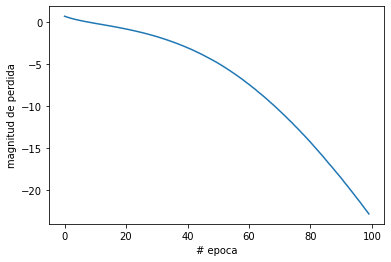

In [13]:
model = Sequential(name = 'RedesNeuronalesAlimentadasHaciaDelante')
model.add(Input(shape=(8,), name='Input-Layer')) # Input Layer - need to speicfy the shape of inputs
model.add(Dense(16, activation='softplus', name='Hidden-Layer1')) # Numero nueronas en la capa 1, softplus(x) = log(exp(x) + 1)
model.add(Dense(1, activation='sigmoid', name='Output-Layer')) # Output Layer, sigmoid(x) = 1 / (1 + exp(-x))

model.compile( optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy', 'Precision', 'Recall']) 

history = model.fit(X_train, # input data
                    Y_train, # target data
                    epochs = 100, # Numero de pasadas
                    workers=8,
                    verbose=True, #mosrar proceso de entrenamiento
                    validation_split=0.2 #Fraction of the training data to be used as validation data
                    )


loss, accuracy, Precision, Recall = model.evaluate(X_test, Y_test)

plt.xlabel("# epoca")
plt.ylabel("magnitud de perdida")
plt.plot(history.history["loss"])
#loss cuanto más bajo sea el valor, más eficiente es la red neuronal

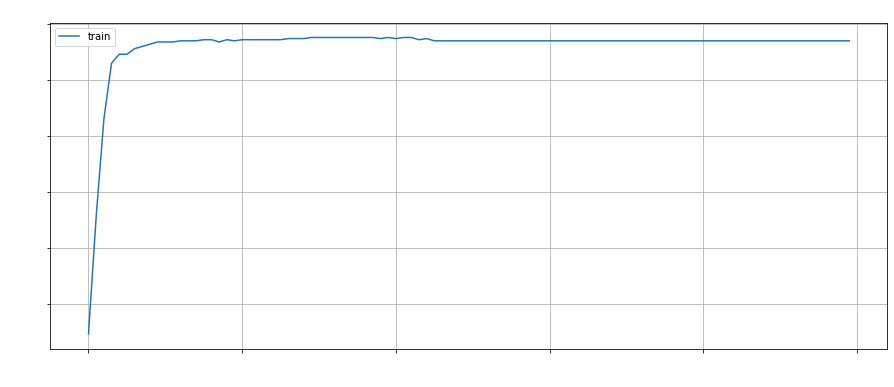

In [ ]:
	
#loss, accuracy = m odel.evaluate(X,Y)Sirve para evaluar el modelo bajo datos que no han sido utilizados para el entrenamiento
plt.figure(figsize=(15,6))

plt.plot(history.history['binary_accuracy'])

plt.legend(['train'],loc='upper left')
plt.xlabel('época')
plt.ylabel('Error medio cuadrado')

plt.grid()

plt.savefig('imagen.png')

plt.title('Modelo', color='w')
plt.ylabel('binary accuracy', color='w')
plt.yticks(color='w')
plt.xlabel('epoca', color='w')
plt.xticks(color='w')
plt.show()